In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Importing Data

In [7]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isna().sum())

In [5]:
df_ = pd.read_csv("Melbourne_housing_FULL.csv")
df = df_.copy()

In [9]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.500,3067.000,2.000,1.000,1.000,126.000,NaN,NaN,Yarra City Council,-37.801,144.996,Northern Metropolitan,4019.000
1,Abbotsford,85 Turner St,2,h,1480000.000,S,Biggin,3/12/2016,2.500,3067.000,2.000,1.000,1.000,202.000,NaN,NaN,Yarra City Council,-37.800,144.998,Northern Metropolitan,4019.000
2,Abbotsford,25 Bloomburg St,2,h,1035000.000,S,Biggin,4/02/2016,2.500,3067.000,2.000,1.000,0.000,156.000,79.000,1900.000,Yarra City Council,-37.808,144.993,Northern Metropolitan,4019.000
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.500,3067.000,3.000,2.000,1.000,0.000,NaN,NaN,Yarra City Council,-37.811,145.012,Northern Metropolitan,4019.000
4,Abbotsford,5 Charles St,3,h,1465000.000,SP,Biggin,4/03/2017,2.500,3067.000,3.000,2.000,0.000,134.000,150.000,1900.000,Yarra City Council,-37.809,144.994,Northern Metropolitan,4019.000


In [10]:
df.shape

(34857, 21)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [16]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price            7610
                 ... 
CouncilArea         3
Lattitude        7976
Longtitude       7976
Regionname          3
Propertycount       3
Length: 21, dtype: int64

## **2. EDA**

Examine the descriptive statistics of dataset

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.000,3.031,0.970,1.000,2.000,3.000,4.000,16.000
Price,27247.000,1050173.345,641467.130,85000.000,635000.000,870000.000,1295000.000,11200000.000
Distance,34856.000,11.185,6.789,0.000,6.400,10.300,14.000,48.100
Postcode,34856.000,3116.063,109.024,3000.000,3051.000,3103.000,3156.000,3978.000
Bedroom2,26640.000,3.085,0.981,0.000,2.000,3.000,4.000,30.000
Bathroom,26631.000,1.625,0.724,0.000,1.000,2.000,2.000,12.000
Car,26129.000,1.729,1.011,0.000,1.000,2.000,2.000,26.000
Landsize,23047.000,593.599,3398.842,0.000,224.000,521.000,670.000,433014.000
BuildingArea,13742.000,160.256,401.267,0.000,102.000,136.000,188.000,44515.000
YearBuilt,15551.000,1965.290,37.328,1196.000,1940.000,1970.000,2000.000,2106.000


In [20]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].dtypes != "O"
                  and dataframe[col].nunique() < cat_th]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].dtypes == "O"
                  and dataframe[col].nunique() > car_th]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car    

In [21]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 34857
Variables: 21
cat_cols: 3
num_cols: 13
cat_but_car: 5
num_but_cat: 0


In [22]:
num_cols

['Rooms',
 'Price',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']

In [23]:
cat_but_car

['Suburb', 'Address', 'SellerG', 'Date', 'CouncilArea']

In [24]:
cat_cols

['Type', 'Method', 'Regionname']

In [28]:
#############################################
# 2. Kategorik Değişken Analizi (Analysis of Categorical Variables)
#############################################

def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       'Ratio': 100 * dataframe[col_name].value_counts() / len(dataframe)
                       }))
    print("##########################################")
    
    if plot:
        sns.countplot(x=col_name ,data=dataframe)
        plt.tight_layout()
        plt.show(block=True)

       Type  Ratio
Type              
h     23980 68.795
u      7297 20.934
t      3580 10.271
##########################################


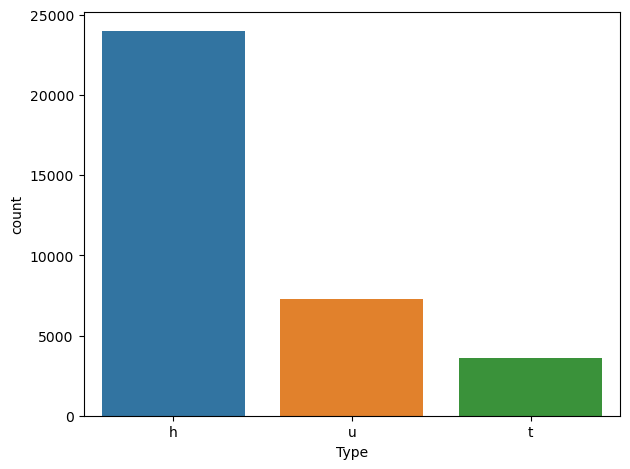

        Method  Ratio
Method               
S        19744 56.643
SP        5095 14.617
PI        4850 13.914
VB        3108  8.916
SN        1317  3.778
PN         308  0.884
SA         226  0.648
W          173  0.496
SS          36  0.103
##########################################


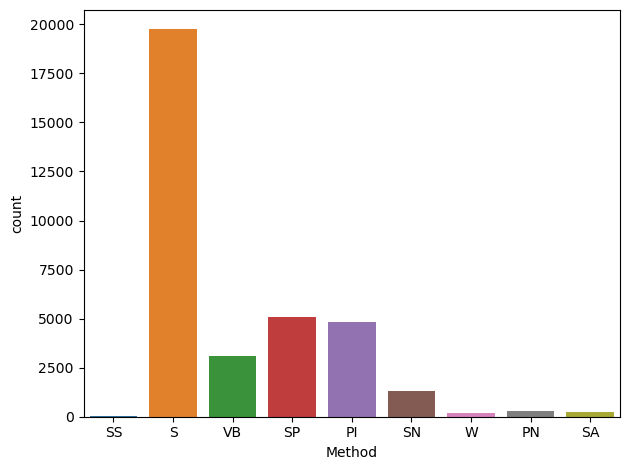

                            Regionname  Ratio
Regionname                                   
Southern Metropolitan            11836 33.956
Northern Metropolitan             9557 27.418
Western Metropolitan              6799 19.505
Eastern Metropolitan              4377 12.557
South-Eastern Metropolitan        1739  4.989
Eastern Victoria                   228  0.654
Northern Victoria                  203  0.582
Western Victoria                   115  0.330
##########################################


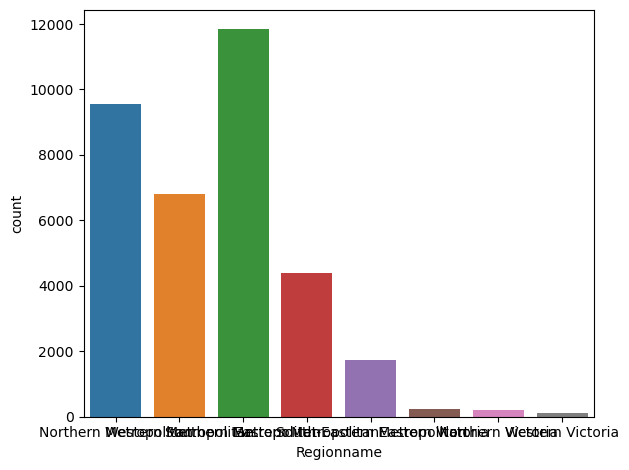

In [29]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

In [30]:
df.drop_duplicates(inplace=True)

In [31]:
# 1 Adet tekrar eden satırımız olduğundan 34856 veri kaldı.
df.shape

(34856, 21)

In [32]:
round((df.describe().T),2)

,count,mean,std,min,25%,50%,75%,max
Rooms,34856.000,3.030,0.970,1.000,2.000,3.000,4.000,16.000
Price,27247.000,1050173.340,641467.130,85000.000,635000.000,870000.000,1295000.000,11200000.000
Distance,34855.000,11.180,6.790,0.000,6.400,10.300,14.000,48.100
Postcode,34855.000,3116.060,109.030,3000.000,3051.000,3103.000,3156.000,3978.000
Bedroom2,26639.000,3.080,0.980,0.000,2.000,3.000,4.000,30.000
Bathroom,26630.000,1.620,0.720,0.000,1.000,2.000,2.000,12.000
Car,26128.000,1.730,1.010,0.000,1.000,2.000,2.000,26.000
Landsize,23046.000,593.610,3398.920,0.000,224.000,521.000,670.000,433014.000
BuildingArea,13741.000,160.250,401.280,0.000,102.000,136.000,188.000,44515.000
YearBuilt,15550.000,1965.290,37.330,1196.000,1940.000,1970.000,2000.000,2106.000


In [34]:
# Geriye 27427 satır verimiz kaldı fakat halen diğer değişkenlerde nan değerler var.
df.dropna(subset=['Price'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(27247, 21)

In [37]:
obj_cols = [obj for obj in df.select_dtypes(['object']).columns]
# Convert objects to categorical variables
for col in obj_cols:
  df[col] = df[col].astype('category')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27247 entries, 0 to 27246
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         27247 non-null  category
 1   Address        27247 non-null  category
 2   Rooms          27247 non-null  int64   
 3   Type           27247 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         27247 non-null  category
 6   SellerG        27247 non-null  category
 7   Date           27247 non-null  category
 8   Distance       27246 non-null  float64 
 9   Postcode       27246 non-null  category
 10  Bedroom2       20806 non-null  float64 
 11  Bathroom       20800 non-null  float64 
 12  Car            20423 non-null  float64 
 13  Landsize       17982 non-null  float64 
 14  BuildingArea   10656 non-null  float64 
 15  YearBuilt      12084 non-null  float64 
 16  CouncilArea    27244 non-null  category
 17  Lattitude      20993 non-null  

In [41]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount'], dtype='object')

In [42]:
df['Rooms v Bedroom2'] = df['Rooms'] - df['Bedroom2']
df["Rooms v Bedroom2"].head(10)

0    0.000
1    0.000
2    0.000
3    0.000
4    1.000
5    0.000
6   -1.000
7    0.000
8      NaN
9      NaN
Name: Rooms v Bedroom2, dtype: float64

In [43]:
df = df.drop(['Bedroom2','Rooms v Bedroom2'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27247 entries, 0 to 27246
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         27247 non-null  category
 1   Address        27247 non-null  category
 2   Rooms          27247 non-null  int64   
 3   Type           27247 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         27247 non-null  category
 6   SellerG        27247 non-null  category
 7   Date           27247 non-null  category
 8   Distance       27246 non-null  float64 
 9   Postcode       27246 non-null  category
 10  Bathroom       20800 non-null  float64 
 11  Car            20423 non-null  float64 
 12  Landsize       17982 non-null  float64 
 13  BuildingArea   10656 non-null  float64 
 14  YearBuilt      12084 non-null  float64 
 15  CouncilArea    27244 non-null  category
 16  Lattitude      20993 non-null  float64 
 17  Longtitude     20993 non-null  

In [45]:
categorical_columns=df.iloc[:,[0,1,3,5,6,7,9,15,18]]
numerical_columns=df.iloc[:,[4,2,8,10,11,12,13,14,16,17,19]]
for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode().iloc[0])
for column in numerical_columns:
    df[column] = df[column].fillna(df[column].median())
df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [46]:
round((df.describe().T),2)

,count,mean,std,min,25%,50%,75%,max
Rooms,27247.000,2.990,0.950,1.000,2.000,3.000,4.000,16.000
Price,27247.000,1050173.340,641467.130,85000.000,635000.000,870000.000,1295000.000,11200000.000
Distance,27247.000,11.280,6.790,0.000,6.400,10.500,14.000,48.100
Bathroom,27247.000,1.450,0.660,0.000,1.000,1.000,2.000,9.000
Car,27247.000,1.790,0.870,0.000,1.000,2.000,2.000,18.000
Landsize,27247.000,565.780,3052.550,0.000,351.000,512.000,592.000,433014.000
BuildingArea,27247.000,142.320,281.160,0.000,133.000,133.000,133.000,44515.000
YearBuilt,27247.000,1968.500,24.540,1196.000,1970.000,1970.000,1970.000,2019.000
Lattitude,27247.000,-37.810,0.080,-38.190,-37.840,-37.800,-37.770,-37.400
Longtitude,27247.000,145.000,0.110,144.420,144.950,145.000,145.050,145.530


In [47]:
# Z Skor metoduna göre artı eksi 3 standart sapmanın dışında kalanları seçili değişkenlerden silelim.
def find_outliers(col):
    z=np.abs(stats.zscore(col))
    idx_outliers=np.where(z>3,True,False)
    return pd.Series(idx_outliers,index=col.index)
idx=find_outliers(df["Landsize"])
idx2=find_outliers(df["BuildingArea"])
idx3=find_outliers(df["YearBuilt"])
a=df.loc[idx]
b=df.loc[idx2]
c=df.loc[idx3]
d=pd.concat([a,b,c],join="inner")
df.drop(d.index, inplace = True)
df.reset_index(drop=True,inplace=True)
(round((df.describe().T),2))

,count,mean,std,min,25%,50%,75%,max
Rooms,26696.000,2.990,0.950,1.000,2.000,3.000,4.000,16.000
Price,26696.000,1037745.040,627554.060,85000.000,631000.000,861000.000,1276000.000,11200000.000
Distance,26696.000,11.390,6.740,0.000,6.600,10.500,14.000,48.100
Bathroom,26696.000,1.450,0.660,0.000,1.000,1.000,2.000,9.000
Car,26696.000,1.800,0.860,0.000,1.000,2.000,2.000,18.000
Landsize,26696.000,511.480,430.480,0.000,367.000,512.000,593.000,9338.000
BuildingArea,26696.000,139.760,53.430,0.000,133.000,133.000,133.000,958.000
YearBuilt,26696.000,1970.070,21.400,1895.000,1970.000,1970.000,1970.000,2019.000
Lattitude,26696.000,-37.810,0.080,-38.190,-37.840,-37.800,-37.760,-37.400
Longtitude,26696.000,145.000,0.110,144.420,144.950,145.000,145.050,145.530


In [49]:
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

### Data Visualization

<Axes: xlabel='Price', ylabel='Count'>

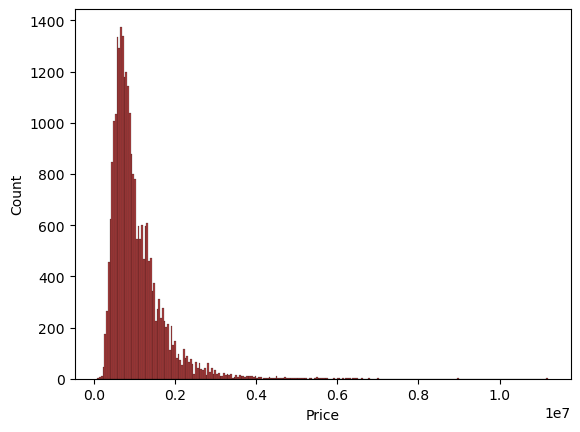

In [50]:
sns.histplot(df, x="Price",color="darkred")

### Train Test Split and Scaling

In [53]:
X = df.drop(['Price', 'Address'], axis=1)
y = df['Price']
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [54]:
X.head()

,Suburb,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,-1.714,-1.039,-0.659,-0.386,-1.386,0.957,-1.319,-0.534,-0.680,-0.925,-0.719,-0.127,-0.003,1.784,0.072,-0.003,-0.809,-0.790
1,-1.714,-1.039,-0.659,-0.386,-1.386,1.094,-1.319,-0.534,-0.680,-2.086,-0.826,-1.137,-3.275,1.784,-0.031,-0.050,-0.809,-0.790
2,-1.714,0.009,-0.659,1.342,-1.386,1.140,-1.319,-0.534,0.836,-2.086,-0.877,0.192,-3.275,1.784,-0.048,-0.040,-0.809,-0.790
3,-1.714,0.009,-0.659,-1.251,-1.386,1.140,-1.319,-0.534,0.836,-0.925,-0.970,-0.127,-0.003,1.784,0.105,-0.017,-0.809,-0.790
4,-1.714,1.056,-0.659,2.206,0.355,1.185,-1.319,-0.534,-0.680,0.236,-0.909,0.042,2.053,1.784,-0.022,-0.043,-0.809,-0.790


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [59]:
# Shape of training data
print("X_train shape: {}".format(X_train.shape))
# Shape of testing data
print("X_test shape: {}".format(X_test.shape))
# Shape of labels for training
print("y_train shape: {}".format(y_train.shape))
# Shape of labels for testing
print("y_test shape: {}".format(y_test.shape))

X_train shape: (21356, 18)
X_test shape: (5340, 18)
y_train shape: (21356,)
y_test shape: (5340,)


### Model Training

In [60]:
models = {
    'Lasso': Lasso(),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'LightGBMRegressor': LGBMRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42, learning_rate=0.03, n_estimators=150, max_depth=9),
    'CatBoostRegressor': CatBoostRegressor(metric_period=100)
}

In [67]:
# ######################################################
#  Automated Hyperparameter Optimization
######################################################

rf_params = {"max_depth": [5, 8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [8, 15, 20],
             "n_estimators": [200, 500]}

gbm_params = {"learning_rate": [0.01, 0.1],
              "max_depth": [3, 8],
              "n_estimators": [500, 1000],
              "subsample": [1, 0.5, 0.7]}

lightgbm_params  = {"learning_rate": [0.01, 0.1],
                "n_estimators": [300, 500],
                "colsample_bytree": [0.7, 1]}

catboost_params = {"iterations": [200, 500],
                   "learning_rate": [0.01, 0.1],
                   "depth": [3, 6]}

xgboost_params =  {
                    'max_depth': [3, 5, 7],
                    'learning_rate': [0.1, 0.01, 0.001],
                    'subsample': [0.5, 0.7, 1]
                   }

regressors = [("RF", models["RandomForestRegressor"], rf_params),
              ('GBM', models["GradientBoostingRegressor"], gbm_params),
              ('LightGBM', models["LightGBMRegressor"], lightgbm_params ),
              ("CatBoost", models["CatBoostRegressor"], catboost_params),
              ('XGBoost', models['XGBoost'], xgboost_params)]

In [69]:
best_models = {}

for name, regressor, params in regressors:
    print(f"########## {name} ##########")
    cv_results = cross_validate(regressor, 
                                X_train, y_train,
                               cv=5,
                               scoring=['r2', 'neg_mean_squared_error'])
    
    rmse = np.sqrt(-cv_results['test_neg_mean_squared_error'].mean())
    r2 = cv_results['test_r2'].mean()
    print(f"RMSE: {round(rmse, 4)} ({name}) ")
    print(f"R-Squared Score: {round(r2, 4)} ({name}) ")
    
    gs_best = GridSearchCV(regressor, params, cv=3, n_jobs=-1, verbose=False).fit(X_train, y_train)
    final_model = regressor.set_params(**gs_best.best_params_)
    
    cv_results = cross_validate(regressor, 
                                X_train, y_train,
                               cv=5,
                               scoring=['r2', 'neg_mean_squared_error'])
    rmse = np.sqrt(-cv_results['test_neg_mean_squared_error'].mean())
    r2 = cv_results['test_r2'].mean()
    print(f"RMSE (After): {round(rmse, 4)} ({name}) ")
    print(f"R-Squared Score (After): {round(r2, 4)} ({name}) ")
    
    print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
    
    best_models[name] = final_model

########## RF ##########
RMSE: 297841.6571 (RF) 
R-Squared Score: 0.7677 (RF) 
RMSE (After): 284808.6333 (RF) 
R-Squared Score (After): 0.7876 (RF) 
RF best params: {'max_depth': None, 'max_features': 7, 'min_samples_split': 8, 'n_estimators': 500}

########## GBM ##########
RMSE: 316640.0359 (GBM) 
R-Squared Score: 0.7375 (GBM) 
RMSE (After): 276360.0664 (GBM) 
R-Squared Score (After): 0.7999 (GBM) 
GBM best params: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 1000, 'subsample': 0.5}

########## LightGBM ##########
RMSE: 283859.8952 (LightGBM) 
R-Squared Score: 0.789 (LightGBM) 
RMSE (After): 275829.4556 (LightGBM) 
R-Squared Score (After): 0.8008 (LightGBM) 
LightGBM best params: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'n_estimators': 500}

########## CatBoost ##########
Learning rate set to 0.06411
0:	learn: 594851.7500374	total: 159ms	remaining: 2m 38s
100:	learn: 306722.2234351	total: 497ms	remaining: 4.42s
200:	learn: 279965.6686262	total: 801ms	remaining: 3.18